# Importing the data for Classification Task

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import recall_score
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, ParameterGrid
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [7]:
df = pd.read_csv ('food-inspections.csv')
df.head()
#df = df[:2000]
df=df.sample(frac = 0.01016, random_state=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 75045 to 153667
Data columns (total 22 columns):
Inspection ID                 2000 non-null int64
DBA Name                      2000 non-null object
AKA Name                      1975 non-null object
License #                     2000 non-null float64
Facility Type                 1949 non-null object
Risk                          1998 non-null object
Address                       2000 non-null object
City                          1999 non-null object
State                         2000 non-null object
Zip                           2000 non-null float64
Inspection Date               2000 non-null object
Inspection Type               2000 non-null object
Results                       2000 non-null object
Violations                    1445 non-null object
Latitude                      1993 non-null float64
Longitude                     1993 non-null float64
Location                      1993 non-null object
Historical Wards 

In [8]:
df.drop('DBA Name', axis = 1, inplace =True)
df.drop('AKA Name', axis = 1, inplace =True)
df.drop('Address', axis = 1, inplace =True)
df.drop('City', axis = 1, inplace =True)
df.drop('State', axis = 1, inplace =True)
df.drop('Inspection Date', axis = 1, inplace =True)
df.drop('Inspection Type', axis = 1, inplace =True)
df.drop('Latitude', axis = 1, inplace =True)
df.drop('Longitude', axis = 1, inplace =True)
df.drop('Location', axis = 1, inplace =True)
df.drop('Historical Wards 2003-2015', axis = 1, inplace =True)
df.drop('Zip Codes', axis = 1, inplace =True)
df.drop('Community Areas', axis = 1, inplace =True)
df.drop('Census Tracts', axis = 1, inplace =True)
df.drop('Wards', axis = 1, inplace =True)
df.drop('Facility Type', axis = 1, inplace =True)
df = df.dropna(axis=0, subset=['Risk'])
df = df.dropna(axis=0, subset=['License #'])
df = df.dropna(axis=0, subset=['Zip'])
df_cols = pd.get_dummies(df['Risk'], prefix='Risk')
df[df_cols.columns] = df_cols
df.drop('Risk', axis = 1, inplace =True)
df['Violations'] = df['Violations'].replace(np.nan,0)
df['Violations'] = df['Violations'].replace('-',0)
m = df.Violations != 0
df.Violations.where(~m,other='1')
df['Violation_1_0'] = m
df['Violation_1_0'] = np.round(df['Violation_1_0']).astype(int)
df['Violation_1_0'] = df['Violation_1_0'].replace('True',1)
df['Violation_1_0'] = df['Violation_1_0'].replace('False',0)
df.drop('Violations', axis = 1, inplace =True)
df['Results'] = (df['Results']).astype(str)
df['Results'] = df['Results'].replace('Not Ready',np.nan)
df['Results'] = df['Results'].replace('Out of Business',np.nan)
df['Results'] = df['Results'].replace('No Entry',np.nan)
df['Results'] = df['Results'].replace('Business Not Located',np.nan)
df = df.dropna(axis=0, subset=['Results'])
df['Results'] = df['Results'].replace('Pass w/ Conditions',1)
df['Results'] = df['Results'].replace('Fail',0)
df['Results'] = df['Results'].replace('Pass',1)
dfnp = np.asarray(df)
dfnpX = df.drop('Results',axis=1) 
dfnpy = df["Results"]
dfnpXx = np.asarray(dfnpX)
dfnpyy = np.asarray(dfnpy)
df

,Inspection ID,License #,Zip,Results,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Violation_1_0
75045,1725226,2442803.0,60614.0,0,1,0,0,1
163883,531616,1172093.0,60615.0,1,1,0,0,0
98544,1515609,2353867.0,60618.0,1,1,0,0,0
4238,2304958,37212.0,60642.0,1,1,0,0,1
44499,2064550,2535860.0,60618.0,1,0,1,0,1
66213,1938139,2362814.0,60617.0,0,0,1,0,1
95127,1441767,2289648.0,60647.0,1,1,0,0,1
165563,634548,24031.0,60612.0,1,1,0,0,1
10668,2285480,2522156.0,60608.0,1,1,0,0,1
41023,2078642,1909713.0,60640.0,1,1,0,0,1


In [9]:
pca_X = df.drop('Results',axis=1) 

# Splitting the data

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
import matplotlib.gridspec as gridspec
import itertools

import numpy as np
X = df.drop('Results',axis=1)  
y = df["Results"]
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
scaler.fit(X_train_org) # Find the min and max of each column #Fit is for training dataset
X_train = scaler.fit_transform(X_train_org) #transforms X_train_org to X_train with all valus between 0 and 1
X_test = scaler.transform(X_test_org)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Hard Voting Classifier 

In [11]:
LogReg_clf = LogisticRegression(random_state=0,C=0.01)
DTree_clf = DecisionTreeClassifier(min_samples_split = 49,max_depth=None,random_state = 0)
SVC_clf = SVC(random_state=0,kernel = 'linear',C = 0.001,probability=True)

LogReg_clf.fit(X_train, y_train)
DTree_clf.fit(X_train, y_train)
SVC_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('SVC', SVC_clf), ('DTree', DTree_clf), ('LogReg', LogReg_clf)], voting='hard')
voting_clf.fit(X_train, y_train)
preds = voting_clf.predict(X_test)
print('Train score: {:.4f}'.format(voting_clf.score(X_test,y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train score: 0.7982


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Soft Voting Classifier

In [12]:
LogReg_clf = LogisticRegression(random_state=0,C=0.01)
DTree_clf = DecisionTreeClassifier(min_samples_split = 49,max_depth=None,random_state = 0)
SVC_clf = SVC(random_state=0,kernel = 'linear',C = 0.001,probability=True)

LogReg_clf.fit(X_train, y_train)
DTree_clf.fit(X_train, y_train)
SVC_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('SVC', SVC_clf), ('DTree', DTree_clf), ('LogReg', LogReg_clf)], voting='soft')
voting_clf.fit(X_train, y_train)
preds = voting_clf.predict(X_test)
print('Train score: {:.4f}'.format(voting_clf.score(X_test,y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train score: 0.7936


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


>svm1 0.952 (0.018)
>svm2 0.542 (0.030)
>svm3 0.957 (0.018)
>svm4 0.617 (0.024)
>svm5 0.899 (0.035)
>soft_voting 0.955 (0.019)


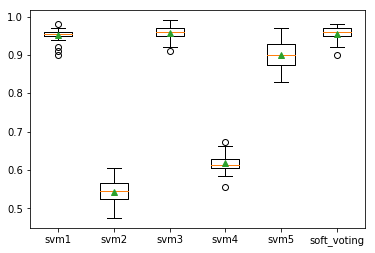

In [13]:
# compare soft voting ensemble to standalone classifiers
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=6, n_informative=2, n_redundant=3, random_state=0)
    return X, y

# get a voting ensemble of mode

def get_voting():
    # define the base models
    models = list()
    models.append(('svm1', SVC(probability=True, kernel='poly', degree=1)))
    models.append(('svm2', SVC(probability=True, kernel='poly', degree=2)))
    models.append(('svm3', SVC(probability=True, kernel='poly', degree=3)))
    models.append(('svm4', SVC(probability=True, kernel='poly', degree=4)))
    models.append(('svm5', SVC(probability=True, kernel='poly', degree=5)))
    # define the voting ensemble
    ensemble = VotingClassifier(estimators=models, voting='soft')
    return ensemble

# get a list of models to evaluate
def get_models():
    models = dict()
    models['svm1'] = SVC(probability=True, kernel='poly', degree=1)
    models['svm2'] = SVC(probability=True, kernel='poly', degree=2)
    models['svm3'] = SVC(probability=True, kernel='poly', degree=3)
    models['svm4'] = SVC(probability=True, kernel='poly', degree=4)
    models['svm5'] = SVC(probability=True, kernel='poly', degree=5)
    models['soft_voting'] = get_voting()
    return models

# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## Bagging models

In [14]:
params = {'max_features': [2,3, 5,7],
          'n_estimators':[100, 200, 300, 500],
          'max_samples':[0.1, 0.5,0.9, 1]}
dt = DecisionTreeClassifier(max_depth = 2 , random_state=0)
bc = BaggingClassifier(base_estimator=dt,n_estimators = 500,max_samples = 100,bootstrap=True,random_state=0)


bc_grid = GridSearchCV(estimator=bc, param_grid=params, cv=5,iid=False)
bc_grid.fit(X_train, y_train)
best_params = bc_grid.best_params_
print(best_params)
print("Best cross-validation score: {:.4f}".format(bc_grid.best_score_))
print('Train score: {:.4f}'.format(bc_grid.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bc_grid.score(X_test, y_test)))

{'max_features': 2, 'max_samples': 0.1, 'n_estimators': 100}
Best cross-validation score: 0.7766
Train score: 0.7766
Test score: 0.7982


In [15]:
model = BaggingClassifier(LogisticRegression(), 
                          n_estimators=500,bootstrap = True, random_state = 1)
model.fit(X_train,y_train)

print('Train score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test score: {:.4f}'.format(model.score(X_test, y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Train score: 0.7766
Test score: 0.7982


>0.1 0.895 (0.029)
>0.2 0.920 (0.028)
>0.3 0.924 (0.034)
>0.4 0.924 (0.030)
>0.5 0.924 (0.029)
>0.6 0.924 (0.023)
>0.7 0.920 (0.027)
>0.8 0.926 (0.027)
>0.9 0.920 (0.028)
>1.0 0.921 (0.026)


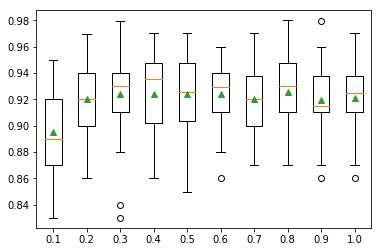

In [16]:
# explore bagging ensemble number of samples effect on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=6, n_informative=3, n_redundant=2, random_state=0)
    return X, y
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in arange(0.1, 1.1, 0.1):
        key = '%.1f' % i
        models[key] = BaggingClassifier(max_samples=i)
    return models
# evaluate a given model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## Pasting Models

In [18]:
model = BaggingClassifier(LogisticRegression(), 
                          n_estimators=10,bootstrap = False, random_state = 0)
model.fit(X_train,y_train)

print('Train score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test score: {:.4f}'.format(model.score(X_test, y_test)))

Train score: 0.7766
Test score: 0.7982


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [19]:
model = BaggingClassifier(DecisionTreeClassifier(), 
                          n_estimators=500,bootstrap = False, random_state = 1)
model.fit(X_train,y_train)

print('Train score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test score: {:.4f}'.format(model.score(X_test, y_test)))

Train score: 1.0000
Test score: 0.7202


## Adaboost boosting models

In [20]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)
print('Train score: {:.4f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ada_clf.score(X_test, y_test)))

Train score: 0.7927
Test score: 0.7775


In [21]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    LogisticRegression(), n_estimators=10,
    algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)
print('Train score: {:.4f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ada_clf.score(X_test, y_test)))

Train score: 0.7766
Test score: 0.7982


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

## Gradient Boosting

In [22]:

params = {
    'n_estimators': [50, 100, 200,500],
    'learning_rate':[0.1, 0.25, 0.5, 0.75, 1],
    'max_features':[2, 5,7 ]
    }
gc = GradientBoostingClassifier(random_state=0)

gc_grid = GridSearchCV(estimator=gc, param_grid=params, cv=5,iid = False)
gc_grid.fit(X_train, y_train)
best_params = gc_grid.best_params_
print(best_params)

{'learning_rate': 0.1, 'max_features': 2, 'n_estimators': 100}


In [23]:
gc = GradientBoostingClassifier(random_state=0,learning_rate= 0.1, max_features = 2, n_estimators = 100)
gc.fit(X_train, y_train)
y_pred= gc.predict(X_test)
print("Best recall score: {:.4f}".format(recall_score(y_test,y_pred,average='macro')))
print('Train score: {:.4f}'.format(gc.score(X_train, y_train)))
print('Test score: {:.4f}'.format(gc.score(X_test, y_test)))

Best recall score: 0.5212
Train score: 0.8080
Test score: 0.7982


<IPython.core.display.Javascript object>


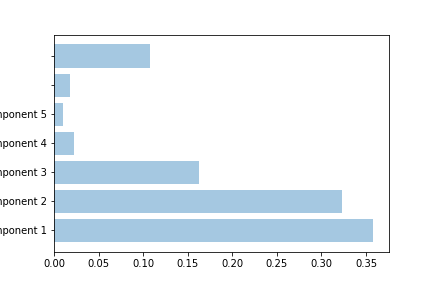

([<matplotlib.axis.YTick at 0x238a49e0b70>,
 <a list of 5 Text yticklabel objects>)

In [31]:
%matplotlib notebook

y_list = gc.feature_importances_
y_pos = np.arange(len(y_list))
features = X
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)

## PCA

In [25]:
x = StandardScaler().fit_transform(pca_X)
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3',
                          'principal component 4', 'principal component 5'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [26]:
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,-0.804159,0.123877,-0.867087,-0.854775,0.346943
1,-0.211881,1.581719,1.571039,-0.966029,-1.526410
2,-0.273396,1.538888,-0.459430,-1.084966,-1.593321
3,-1.417836,-0.816771,0.179773,0.769452,0.452568
4,2.060594,-1.554730,-1.357217,-0.890292,0.146556
5,2.066002,-1.550068,-1.075847,-0.903767,0.170804
6,-0.816647,-0.050613,-0.648417,0.878346,-0.296930
7,-0.927618,-0.100900,2.237850,-0.526410,0.621614
8,-0.926307,0.011258,-1.511094,-1.245001,0.571556
9,-1.035392,-0.289001,-1.013454,0.480411,0.057097


 90 Percent of the data has been retained by our Principal components

In [27]:
pca.explained_variance_ratio_

array([0.27884406, 0.18661336, 0.17037283, 0.14422362, 0.12199251])

#Splitting the data 

In [28]:
X = principalDf
y = df["Results"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

## Models after PCA

In [29]:
##### from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

knn = KNeighborsClassifier(6)
knn.fit(X_train, y_train)

print('K Neighbour after PCA')
print('Train score: {:.5f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.5f}'.format(knn.score(X_test, y_test)))

lreg = LogisticRegression()
lreg.fit(X_train, y_train) 

print('\nLogistic Regression after PCA')
print('Train score: {:.4f}'.format(lreg.score(X_train, y_train)))
print('Test score: {:.4f}'.format(lreg.score(X_test, y_test)))


clf = LinearSVC()
clf.fit(X_train,y_train)

print('\nLinear SVC after PCA')
print('Train score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(clf.score(X_test, y_test)))

clf2 = SVC(kernel='linear')
clf2.fit(X_train, y_train)

print('\nKernel Linear SVC after PCA')
print('Train score: {:.4f}'.format(clf2.score(X_train, y_train)))
print('Test score: {:.4f}'.format(clf2.score(X_test, y_test)))

clf3 = SVC(kernel='rbf', gamma=0.001, C=0.001)
clf3.fit(X_train, y_train)

print('\nKernel rbf SVC after PCA')
print('Train score: {:.4f}'.format(clf3.score(X_train, y_train)))
print('Test score: {:.4f}'.format(clf3.score(X_test, y_test)))

clf4 = SVC(kernel='poly',degree=3, gamma=0.001, C=0.001)
clf4.fit(X_train, y_train)


print('\nKernel poly SVC after PCA')
print('Train score: {:.4f}'.format(clf4.score(X_train, y_train)))
print('Test score: {:.4f}'.format(clf4.score(X_test, y_test)))

dtree = DecisionTreeClassifier(min_samples_split = 49,max_depth=None,random_state=0)
dtree.fit(X_train, y_train)

print('\nDecision Tree Classifier after PCA')
print("Accuracy on training set: {:.4f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(dtree.score(X_test, y_test)))


K Neighbour after PCA
Train score: 0.78500
Test score: 0.75459

Logistic Regression after PCA
Train score: 0.7766
Test score: 0.7982

Linear SVC after PCA

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Train score: 0.7766
Test score: 0.7982

Kernel Linear SVC after PCA
Train score: 0.7766
Test score: 0.7982

Kernel rbf SVC after PCA
Train score: 0.7766
Test score: 0.7982

Kernel poly SVC after PCA
Train score: 0.7766
Test score: 0.7982

Decision Tree Classifier after PCA
Accuracy on training set: 0.8110
Accuracy on test set: 0.7385


We see that the Decision tree classifier and K neighbour Classifier still give the best result for this dataset and after PCA the K neighbour model does slightly better

## Deep Learning Models

## Grid search to find best parameters

In [36]:
X = df.drop('Results',axis=1)  
y = df["Results"]
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
scaler.fit(X_train_org) # Find the min and max of each column #Fit is for training dataset
X_train = scaler.fit_transform(X_train_org) #transforms X_train_org to X_train with all valus between 0 and 1
X_test = scaler.transform(X_test_org)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [37]:
def create_model():
    #create model
    model = Sequential()
    model.add(Dense(12, input_dim=7, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [38]:
np.random.seed(0)

In [39]:
model = KerasClassifier(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100]}
grid_search = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5)

In [40]:
grid_search_result = grid_search.fit(X, y)

In [41]:
grid_search_result

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000238A4A2D470>,
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'batch_size': [10, 20, 30, 40], 'epochs': [10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [42]:
print("Best parameters: {}".format(grid_search.best_params_))

Best parameters: {'batch_size': 40, 'epochs': 100}


Modeling the deep learning with best parameters

In [43]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [44]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
# Fit the model
#model.fit(X_train, y_train, epochs=150, batch_size=10)
model.fit(X_train, y_train, epochs=50, batch_size=30)

Epoch 1/50
1307/1307 [==============================] - 0s 137us/step - loss: 0.5774 - accuracy: 0.7682
Epoch 2/50
1307/1307 [==============================] - 0s 46us/step - loss: 0.5420 - accuracy: 0.7766
Epoch 3/50
1307/1307 [==============================] - 0s 39us/step - loss: 0.5355 - accuracy: 0.7766
Epoch 4/50
1307/1307 [==============================] - 0s 39us/step - loss: 0.5332 - accuracy: 0.7766
Epoch 5/50
1307/1307 [==============================] - 0s 40us/step - loss: 0.5319 - accuracy: 0.7766
Epoch 6/50
1307/1307 [==============================] - 0s 40us/step - loss: 0.5302 - accuracy: 0.7766
Epoch 7/50
1307/1307 [==============================] - 0s 40us/step - loss: 0.5284 - accuracy: 0.7766
Epoch 8/50
1307/1307 [==============================] - 0s 40us/step - loss: 0.5274 - accuracy: 0.7766
Epoch 9/50
1307/1307 [==============================] - 0s 43us/step - loss: 0.5259 - accuracy: 0.7766
Epoch 10/50
1307/1307 [==============================] - 0s 44us/step - 

In [46]:
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

436/436 [==============================] - 0s 69us/step

accuracy: 79.82%


In [47]:
y_predict = model.predict(X_test)
y_predict

array([[0.9178066 ],
       [0.734535  ],
       [0.79421985],
       [0.7776403 ],
       [0.77500564],
       [0.80215585],
       [0.77298343],
       [0.7562429 ],
       [0.79108065],
       [0.9374483 ],
       [0.80023074],
       [0.80325544],
       [0.72204334],
       [0.7598636 ],
       [0.76473856],
       [0.80816436],
       [0.7778231 ],
       [0.8371937 ],
       [0.8036203 ],
       [0.7336406 ],
       [0.7719512 ],
       [0.79961276],
       [0.782602  ],
       [0.7199863 ],
       [0.7957899 ],
       [0.7892271 ],
       [0.7849457 ],
       [0.77049685],
       [0.76127964],
       [0.77643526],
       [0.5572803 ],
       [0.7912293 ],
       [0.81001055],
       [0.76839525],
       [0.7600001 ],
       [0.7797265 ],
       [0.7709899 ],
       [0.91357446],
       [0.8063804 ],
       [0.56332546],
       [0.72455615],
       [0.6144768 ],
       [0.74104655],
       [0.7398961 ],
       [0.8032237 ],
       [0.75994486],
       [0.6919554 ],
       [0.800